In [1]:
import keras
keras.__version__ # 언더바 2개 오타

'2.8.0'

In [2]:
from keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)
#(num_words=10000= 케라스 언어로 "전체데이터 중 빈도 높은 만개만 가져옴" 명령
#imdb=영화리뷰데이터

In [3]:
#구글사이트에서 가져온데이터임을 알림. 프래임워크가 주소만 가지고 있다가 필요할때마다 데이터를 불러옴.

len(train_data)
#학습용데이터의 갯수

25000

In [4]:
len(test_data) #테스트데이터의 갯수

25000

In [5]:
#학습:테스트 5:5비율로 준비됨

train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
#위 데이터 해석= 숫자들은 전부 단어들임. 만개의 제약을 걸었으므로 전체 갯수는 999개

train_label[0] #오류발생 초기세팅시 T라고 적음

1

In [7]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#위 리뷰를 실제문자로 디코딩 해본결과 1은 긍정적리뷰임을 확인 <P>
#단어마다 넘버를 매기면 처리할 데이터나 너무 많아져서 긍정/부정으로 1/0으로 바꿔 데이터처리

In [9]:
import numpy as np
#백터라이즈라는 함수를 만들고 순서대로 시퀀시스를 붙임
#sequences=넘겨받을 숫자를 파라메터로 설정.디멘션=차원을 받아들이는 변수

# np.zeros= 0으로 채워진 배열. 제로스 외 원스 엠티 등 다양 10개 행에 만개짜리 값생김
# np.zeros=의 값을 리절트라는 변수로 저장
# _탈자
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((10,dimension))
    
    return results

In [10]:
vectorize_sequences(train_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
vectorize_sequences(train_data).shape

(10, 10000)

In [12]:
#이제는 넘겨받은 단어의 수(sequences)만큼 배열의갯수를 만듬
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    return results

vectorize_sequences(train_data).shape


(25000, 10000)

In [13]:
# 지정안 전체데이터를 생성해옴. 이제 2만5천개 행 만개 열의 데이터 중 
#긍정'1'에 해당하는 데이터 칸에 1을 넣도록 for문 명령
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

vectorize_sequences(train_data)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
#위 결과데이터를 x_train/test 로 저장함
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
#데이터형태를 정수->실수로 바꿈
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [16]:
#데이터 기본작업 끝. 신경망생성. 데이터가 많으므로 3개의 model이라는 이름으로 생성
#신경망 안에 뉴런을 16개로 지정

from keras import models
from keras import layers

#model.add(layers.dense(16=신경망갯수지정,엑티베이션펑션을 렐루로 지정))
#model.add(layers.dense(1=신경망갯수지정, sigmoid 0/1둘중의 하나 변별력을 주기 위해 ))
#첫번째 데이터만 nput_shape=(10000, 지정= 입력창구, 나머지는 뒤에서 연산되므로.


model = models. Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

 #' activation 탈자, D 대소문자 오타

In [17]:
# model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics='accuracy')
# # 시그모이드와 소프트맥스(다수) 사용시 분류문제라는것을 알수 있음
# ##분류문제에는 crossentropy',1/0 둘중 하나로 분류일 경우 바이너리(다수일경우 카테고리컬)
# #metrics=측정단위= '정확도'



In [18]:
# x_val = x_train[:10000] #학습데이터 2만5천개중 앞에서부터 만개까지만 떼냄
# partial_x_train = x_train[10000:] #만개이후 나머지부분을 저장

# y_val = y_train[:10000] 
# partial_y_train = y_train[10000:]

In [19]:
# #잘라놓은 15000건의 데이터로 학습하고 나머지 위의 만건의 데이터로 검증
# model.fit(partial_x_train, partial_y_train,
#          epochs=20, batch_size=512) #epochs=학습횟수

In [20]:
# #실행결과를 변수로 저장
# # validation_data= 학습결과 토대로 만개로 검증
# history = model.fit(partial_x_train, partial_y_train,
#          epochs=20, batch_size=512, validation_data=(x_val, y_val))

In [21]:
# history.history
# #실행결과
# #accuracy': 정확도 'val_loss':검증손실값 'val_accuracy':검증정확도

In [22]:
# history_dict = history.history
# #검증결과 저장

# history_dict.keys()
# #검증결과 확인값 출력

In [23]:
# #위의 데이터를 그래프로 그려 학습중단시점을 판단
# import matplotlib.pyplot as plt

In [24]:
# #그래프로 그릴 값 불러오기
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# #반복횟수 구하기
# epochs = range(1, len(acc) + 1)

In [25]:
# plt.plot(epochs,loss, 'bo', label='training loss')
# plt.plot(epochs, val_loss, 'r-', label='validation loss') #  val_탈자
# plt.title('training and validation loss')
# plt.xlabel('Epochs') #label 오타 lable
# plt.ylabel('Loss')
# plt.legend()


In [26]:
#학습정확도는 나쁘지 않으나 검증정확도가 너무 높음
#매개변수 수정필요. 옵티마이저 부터 수정 

from keras import losses
from keras import metrics
from tensorflow.keras import optimizers #ㄱ->ㅣ오타

# 옵티마이저= 가중치 조절. 가중치조절시 RMSprop(lr=0.001) 로 에포크데이터에 과접합 막도록 가중치 설정
model.compile(optimizer=optimizers. RMSprop(lr=0.001) ,
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
history = model.fit(partial_x_train, 
          partial_y_train,
          epochs=3,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 20s 570ms/step - loss: 0.5191 - binary_accuracy: 0.7882 - val_loss: 0.3807 - val_binary_accuracy: 0.8741
Epoch 2/3
30/30 [==============================] - 4s 138ms/step - loss: 0.3055 - binary_accuracy: 0.9038 - val_loss: 0.3263 - val_binary_accuracy: 0.8728
Epoch 3/3
30/30 [==============================] - 4s 138ms/step - loss: 0.2227 - binary_accuracy: 0.9285 - val_loss: 0.3321 - val_binary_accuracy: 0.8638


In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [30]:
import matplotlib.pyplot as plt

In [31]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#속성, 메소드명은 계속 바뀔 수 있으니 에러나오면 당황하지 말고 검색하거나 런타임재실행

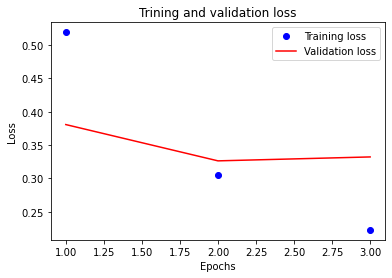

In [32]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Trining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# 에포크를 20에서 4로 줄일때가 정확함을 확인

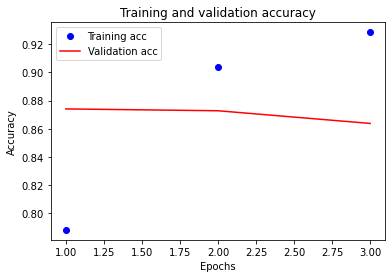

In [33]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#에포크 20에서 2로 줄일때가 정확함을 확인

#상황에 맞춰 에포크를 조정해야함<p>
 로스값이 작은것=수치를 정확히 맞추고싶을때 적용<p>
 정확도가 작은것=흐름(트렌드)을 맞추고 싶을때 적용<p>
#데이터관련직종에 들어가면 실무에서 여러상황들로 쌓인 감을 토대로 에포크수 등을 결정해야함<p>

In [34]:
# 위 데이터의 평가값을 리절트로 저장
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 8s 9ms/step - loss: 0.3439 - binary_accuracy: 0.8576


In [35]:
results

[0.3439481556415558, 0.8576400279998779]

In [36]:
#정확도는 87% 로스값은 0.31
#따라서 이모델은 83%의 정확도로 리뷰를 긍/부정을 구분해내는 모델 생성함.
##할때마다 달라지는 수치임.

#83%의 정확도모델로 예측해봄
model.predict(x_test)#x_test값을 넣으면 y_test값이 나옴

array([[0.38637066],
       [0.9993852 ],
       [0.99072134],
       ...,
       [0.26005745],
       [0.2851851 ],
       [0.8018201 ]], dtype=float32)

In [37]:
#배열의 각 수치 중 1에 가까운 도출값일수록 긍정적인 리뷰라는 증거